# Parkinson's Disease Classification
# Evaluation
## 1. Statistical description (5%)
The students should perform a statistical analysis of the datasets in advance and summarize relevant
implications in the report, such as the underlying distributions and hypothesized forms feature dependency.
## 2. Preprocessing (20%)
In accordance with the properties of the input dataset and the behavior of the target learning algorithm,
the students are allowed to apply preprocessing techniques when needed or under a solid conjecture of its
potential impact on learning. 
## 3. Unsupervised
### a. Association Rules (7.5%)
### b.Clustering (7.5%)
Unsupervised exploration must be done through clustering and association rule mining. Class attributes
should not be used to explore the data, unless there is a well substantiated interest for mining classconditional data or discovering association rules with classes in the antecedent/consequent. Nevertheless,
class attributes may be used to objectively assess clustering results and evaluate the discriminative power
of certain association rules. Besides this, statistical evaluation must be performed using the studied indexes.
## 4. Classification
### a. Naïve Bayes (2%)
### b. Instance-based Learning (3%)
### c. Decision Trees (5%)
### d.Random Forests (5%)
### e. XGBoost (5%)
Supervised exploration must be done via the application of kNN, Naïve Bayes, Decision Trees, Random
Forests and XGBoost. For this purpose, the use of class attributes is mandatory. Evaluation of the obtained
models should be done as usual, through accuracy measures and evaluation charts, as studied in the classes.
A thorough comparison of the adequacy of the models should be present taking into consideration the
adequacy of their behavior against the properties of each dataset and their observed performance.

# 5. Evaluation and critical analysis (30%)
A project that applies the suggested data mining techniques over the given datasets and provides a clear
and sound analysis of the collected results is not necessarily an excelling project.
Excelling projects have four major characteristics.
First, they show an acute understanding of the data characteristics and their impact on the learning.
Excelling projects formulate hypothesis behind differences in performance.
Second, they have precise and succinct language: no redundancies, unnecessary or subjective statements.
Third, excelling projects are often a result of a creative thinking on ways of improving the learning.
Illustrating, the justified use of a specific preprocessing technique (whether the inclusion of new features,
space transformations, handling of outliers or specific forms of noise) can make a difference.
Fourth, robust assessments go beyond simple performance indicators. Excelling projects draw (parametervarying) plots, test hypotheses, and establish ratios to understand less-trivial performance views such as
robustness to noise, domain adequacy or overfitting propensity.
## 6. Creativity (10%)



### Each group should show their results (summary charts) concerning the topics listed for each week for the 1st dataset in the project, at their lab. Evaluation points:
- Week 3 (Sep 30th) - Univariate analysis
- Week 4 (Oct 7th) - Multivariate analysis
- Week 5 (Oct 14th) - Naive Bayes and KNN
- Week 6 (Oct 21st) - Decision trees
- Week 7 (Oct 28th) - Ensembles
- Week 8 (Nov 4th) - Pattern Mining
- Week 9 (Nov 11th) - Clustering
#### The evaluations on the last  three labs will cover the topics exercised during the class:
- Week 11 (Nov 25th) - Regression
- Week 12 (Dec 2nd) - Time series data analysis
- Week 13 (Dec 9th) - Forecasting
- Extra mark - Biclustering ( if you miss any previous point) 

# Statistical Description

In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
#import data parkinsons disease speech features
data = pd.read_csv("dataset/pd_speech_features.csv", skiprows=1)

In [4]:
#check size of data
data.shape

(756, 755)

In [11]:
#check type of instances
data.dtypes

id                              int64
gender                          int64
PPE                           float64
DFA                           float64
RPDE                          float64
numPulses                       int64
numPeriodsPulses                int64
meanPeriodPulses              float64
stdDevPeriodPulses            float64
locPctJitter                  float64
locAbsJitter                  float64
rapJitter                     float64
ppq5Jitter                    float64
ddpJitter                     float64
locShimmer                    float64
locDbShimmer                  float64
apq3Shimmer                   float64
apq5Shimmer                   float64
apq11Shimmer                  float64
ddaShimmer                    float64
meanAutoCorrHarmonicity       float64
meanNoiseToHarmHarmonicity    float64
meanHarmToNoiseHarmonicity    float64
minIntensity                  float64
maxIntensity                  float64
meanIntensity                 float64
f1          

### Only numerical instances, no nominal instances

In [34]:
#Look closer at data
data.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [35]:
data.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


### Looking at the data shows
- Every id has 3 records
- Gender and class give either 0 or 1 value

In [13]:
#Count the number of patients
data['id'].nunique()

252

### There are 252 patients

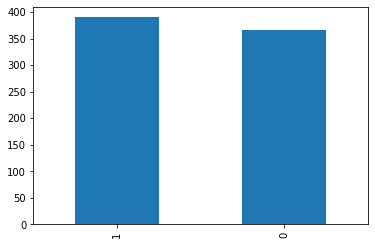

In [20]:
#Show the gender distribution
data.gender.value_counts().plot(kind='bar')

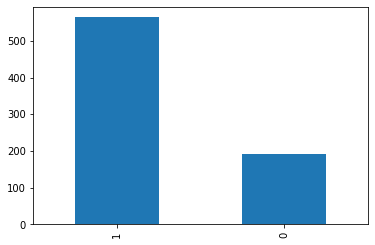

In [38]:
#show the class (target) distribution
data['class'].value_counts().plot(kind='bar')

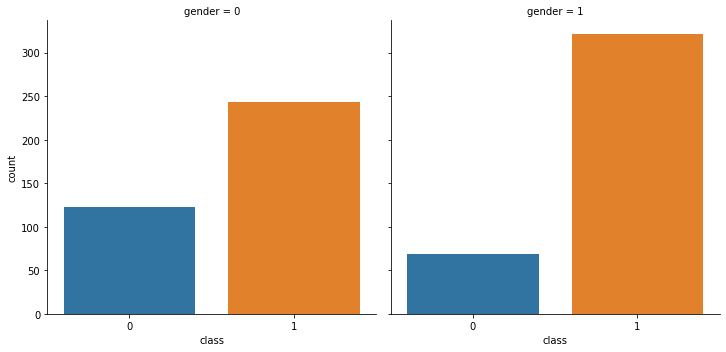

In [23]:
#show correlation between gender and class
plot = sns.catplot(x="class", col="gender", data=data, kind="count")

### We can see that there's almost the same amount of males and females in the data set. We can also see one gender (1) seems to have more positive patients than gender (0)

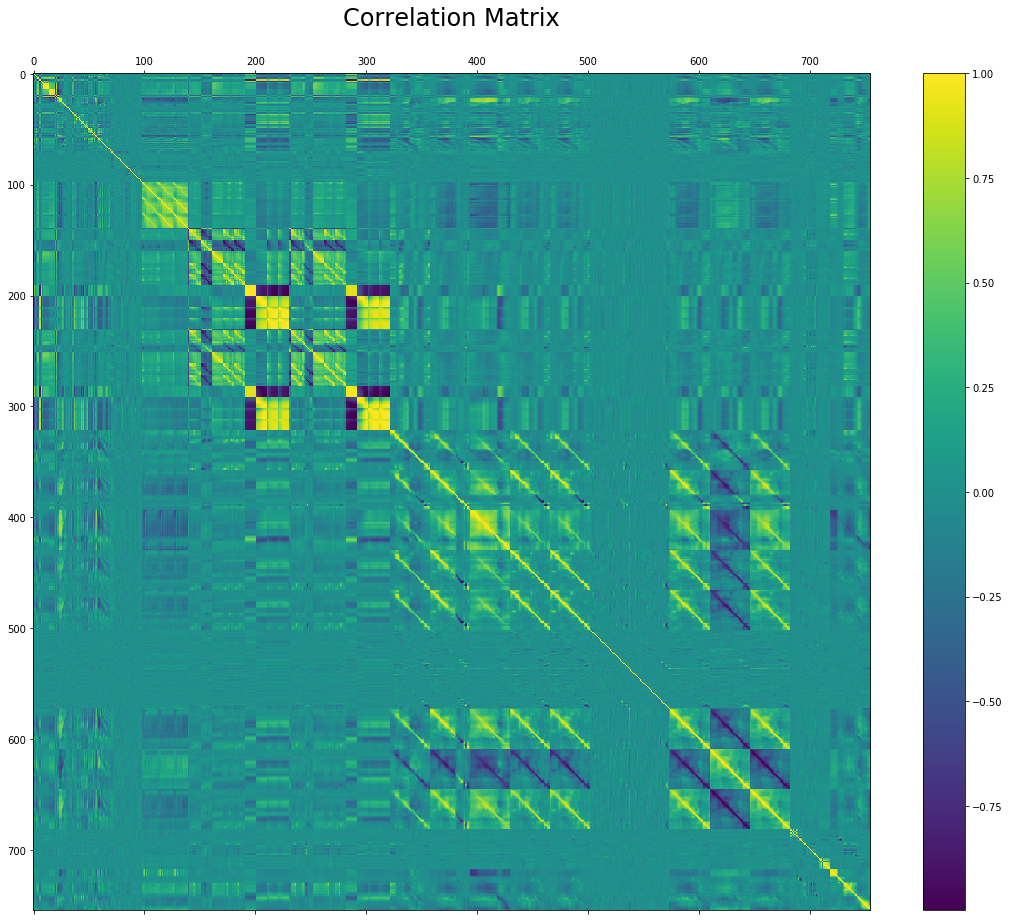

In [5]:
#show correlation
f = plt.figure(figsize=(19, 15))
plt.matshow(data.corr(), fignum=f.number)
cb = plt.colorbar()
plt.title('Correlation Matrix', fontsize=24);

### There are a lot of variables so it is hard to determine the correlation, but there are some yellow areas that show high correlation

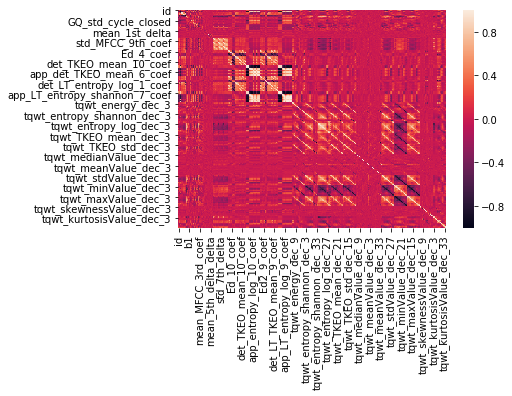

In [8]:
corr = data.corr()
sns.heatmap(corr)


In [9]:
corr.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,...,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000
mean,0.008035,-0.021696,-0.042585,-0.023412,0.022177,0.031484,0.030910,-0.033851,0.031607,0.022826,...,0.019469,0.011171,-0.004912,-0.006976,-0.007028,-0.011033,-0.019791,-0.024714,-0.039149,-0.025585
std,0.066542,0.212435,0.156558,0.212393,0.236468,0.305596,0.305876,0.277392,0.119368,0.196903,...,0.165058,0.140672,0.114793,0.114710,0.114350,0.113228,0.116544,0.127672,0.168279,0.171735
min,-0.166117,-0.614768,-0.621077,-0.623071,-0.754855,-0.897079,-0.896566,-0.897079,-0.423660,-0.713408,...,-0.491445,-0.408171,-0.398613,-0.417959,-0.445090,-0.430697,-0.438088,-0.489868,-0.620326,-0.393029
25%,-0.033029,-0.057041,-0.089553,-0.133000,-0.120942,-0.076411,-0.075607,-0.076408,-0.033557,-0.085568,...,-0.083223,-0.084929,-0.068670,-0.064985,-0.059025,-0.063213,-0.081924,-0.098254,-0.118589,-0.144657
50%,0.006096,0.004974,-0.009731,0.006192,0.012278,-0.002047,-0.001794,-0.003160,0.011197,0.003280,...,-0.003432,-0.005021,-0.015190,-0.021080,-0.017624,-0.017729,-0.022749,-0.030503,-0.033310,-0.009687
75%,0.052271,0.063179,0.044172,0.082511,0.167119,0.079209,0.078838,0.056739,0.063725,0.107456,...,0.140966,0.104447,0.042973,0.037679,0.035066,0.029669,0.029175,0.039187,0.036958,0.067887
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Preprocessing

In [12]:
data.describe(include='all')

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [18]:
data.isna().sum().sum()

0

### There's no missing values, also no nominal classes so no dummification needed.

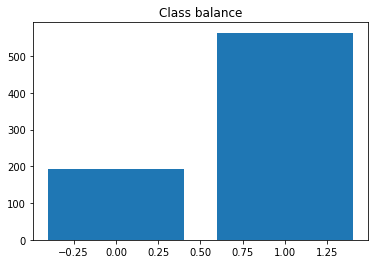

Minority class: 564
Majority class: 192
Proportion: 2.94 : 1


In [20]:
unbal = data
target_count = unbal['class'].value_counts()
plt.figure()
plt.title('Class balance')
plt.bar(target_count.index, target_count.values)
plt.show()

min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

print('Minority class:', target_count[ind_min_class])
print('Majority class:', target_count[1-ind_min_class])
print('Proportion:', round(target_count[ind_min_class] / target_count[1-ind_min_class], 2), ': 1')
